In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
import os
import pickle
import time

NAME = "ML-PROJECT-{}".format(int(time.time()))

#tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
#tboard_log_dir = os.path.join("logs",NAME)
#tensorboard = TensorBoard(log_dir = tboard_log_dir)

X = pickle.load(open("X_new.pickle", "rb"))
Y = pickle.load(open("Y_new.pickle", "rb"))   
X=X/255

#SPE= len(train_batch.classes)//BS
#VS = len(valid_batch.classes)//BS
#print(SPE,VS)


model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = X.shape[1:], activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#model.add(Conv2D(64, (3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X,Y,batch_size=20,epochs=10,validation_split = 0.2) #callbacks=[tensorboard] )
#classifier.fit_generator(X, samples_per_epoch = 8000, nb_epoch = 5, validation_data = Y,
                        # nb_val_samples = 2000,
                         #steps_per_epoch = 20)

model.save('models/eyes', overwrite=True)

Train on 7778 samples, validate on 1945 samples
Epoch 1/10
7778/7778 [==============================] - 127s 16ms/sample - loss: 0.3133 - acc: 0.9023 - val_loss: 0.5080 - val_acc: 0.7121
Epoch 2/10
7778/7778 [==============================] - 124s 16ms/sample - loss: 0.1522 - acc: 0.9475 - val_loss: 0.0582 - val_acc: 0.9799
Epoch 3/10
7778/7778 [==============================] - 126s 16ms/sample - loss: 0.1064 - acc: 0.9641 - val_loss: 0.0333 - val_acc: 0.9892
Epoch 4/10
7778/7778 [==============================] - 125s 16ms/sample - loss: 0.0733 - acc: 0.9749 - val_loss: 0.0292 - val_acc: 0.9892
Epoch 5/10
7778/7778 [==============================] - 125s 16ms/sample - loss: 0.0618 - acc: 0.9780 - val_loss: 0.0784 - val_acc: 0.9717
Epoch 6/10
7778/7778 [==============================] - 125s 16ms/sample - loss: 0.0474 - acc: 0.9848 - val_loss: 0.0122 - val_acc: 0.9959
Epoch 7/10
7778/7778 [==============================] - 125s 16ms/sample - loss: 0.0438 - acc: 0.9857 - val_loss: 0.01

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)
#y_pred= model.predict_classes(X)
model.fit(x_train, y_train)
y_pred = model.predict_classes(x_test)
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7778/7778 [==============================] - 29s 4ms/sample - loss: 0.0457 - acc: 0.9873
0.9933161953727506
[[975   4]
 [  9 957]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       979
           1       1.00      0.99      0.99       966

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [35]:
model.fit(x_train, y_train)
y_pred = model.predict_classes(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7778/7778 [==============================] - 28s 4ms/sample - loss: 0.0260 - acc: 0.9923
0.9969151670951156
[[977   2]
 [  4 962]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       966

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945



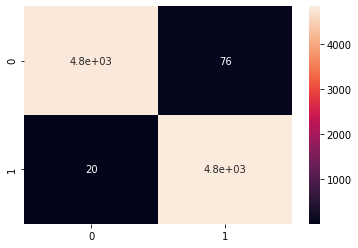

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True)